In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess_onehot import get_zip_info, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv")

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


In [3]:
df.fillna("Unknown or not specified", inplace=True)

In [4]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [5]:
df=df.drop(columns=["Date received",	"Date sent to company" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [6]:

df=df.drop(columns=[ "Complaint ID", "dias de retraso"])

In [7]:
df

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,RBS Citizens,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,44241,"CashCall, Inc.",Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,77433,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,84405,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,60411,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,48622,Experian,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,72160,U.S. Bancorp,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,Regions,Closed with non-monetary relief,Yes,No,Thursday


In [8]:
df.State.value_counts()

State
CA         871
FL         570
TX         467
NY         417
IL         241
PA         238
GA         238
NJ         221
OH         208
MD         198
VA         181
NC         167
MI         157
AZ         128
WA         106
CO         105
TN          97
MA          90
AL          84
NV          83
SC          81
OR          77
MO          74
WI          73
MN          70
IN          56
CT          54
LA          49
ME          43
OK          41
KS          39
DE          39
KY          35
UT          34
AR          34
NM          30
Unknown     30
MS          30
IA          28
DC          28
ID          26
NE          24
RI          24
NH          23
HI          18
WV          14
VT          12
PR          12
SD           9
MT           7
WY           7
AP           5
AK           5
ND           4
VI           1
PW           1
AE           1
AS           1
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   ZIP code            6006 non-null   int64 
 6   Company             6006 non-null   object
 7   Company response    6006 non-null   object
 8   Timely response?    6006 non-null   object
 9   Consumer disputed?  6006 non-null   object
 10  weekday             6006 non-null   object
dtypes: int64(1), object(10)
memory usage: 563.1+ KB


In [10]:
import pandas as pd


In [11]:
X=df.drop(columns=["Consumer disputed?"])

In [12]:
y=df["Consumer disputed?"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [14]:
import optuna
from optuna import Trial

from optuna.distributions import IntDistribution, CategoricalDistribution, FloatDistribution

param_dist = {
    # Parámetros para GradientBoostingClassifier
    "classifier__gbc__n_estimators": IntDistribution(50, 300),
    "classifier__gbc__learning_rate": FloatDistribution(0.01, 0.2),
    "classifier__gbc__max_depth": IntDistribution(3, 10),
    "classifier__gbc__subsample": FloatDistribution(0.5, 1.0),


    # Parámetros para RandomForestClassifier
    "classifier__rf__n_estimators": IntDistribution(50, 500),
    "classifier__rf__max_depth": IntDistribution(20, 45),
    "classifier__rf__min_samples_split": IntDistribution(2, 20),
    "classifier__rf__min_samples_leaf": IntDistribution(1, 20),
    "classifier__rf__max_features": CategoricalDistribution(['sqrt', 'log2', None]),
    "classifier__rf__bootstrap": CategoricalDistribution([True, False]),
    "classifier__rf__class_weight": CategoricalDistribution(['balanced', 'balanced_subsample', None]),

    # Parámetros para SVC
    "classifier__svc__C": FloatDistribution(0.1, 10),
    "classifier__svc__kernel":CategoricalDistribution (['linear', 'poly', 'rbf', 'sigmoid']),
    "classifier__svc__degree": IntDistribution(2, 5), # Solo para el kernel 'poly'
    "classifier__svc__gamma": CategoricalDistribution(['scale', 'auto']),
    "classifier__svc__class_weight":CategoricalDistribution ([None, 'balanced']),

    # Parámetros para knn

    "classifier__knn__n_neighbors": IntDistribution(1, 30),
    "classifier__knn__weights": CategoricalDistribution(["uniform", "distance"]),
    "classifier__knn__algorithm": CategoricalDistribution([ "brute"]),
    "classifier__knn__p": IntDistribution(1, 2)
}

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804 entries, 27601 to 6784
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           4804 non-null   object
 1   Sub-product       4804 non-null   object
 2   Issue             4804 non-null   object
 3   Sub-issue         4804 non-null   object
 4   State             4804 non-null   object
 5   ZIP code          4804 non-null   int64 
 6   Company           4804 non-null   object
 7   Company response  4804 non-null   object
 8   Timely response?  4804 non-null   object
 9   weekday           4804 non-null   object
dtypes: int64(1), object(9)
memory usage: 412.8+ KB


In [16]:
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['ZIP code']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Identify feature types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()




# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Categorical preprocessing with type conversion fix


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown or not specified')),  # opcional
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

gbc_clf = GradientBoostingClassifier(random_state=42) # Mezcla los datos
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) # Se usa en combinación con otro arg
svm_clf = SVC(gamma="scale", random_state=42, probability=True)
knn_clf= KNeighborsClassifier()

estimators = [('gbc', gbc_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)]

voting_clf = VotingClassifier(estimators=estimators, voting='soft')



# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', SMOTE(random_state=42)),
    ('classifier', voting_clf)
])

# Train the pipeline

In [18]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']
trained_preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['ZIP code']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown '
                                                                           'or '
                                                                           'not '
                                                                           'specified',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Product', 'Sub-product', 'Issue',
                                  'Sub-issue', 'State', 'Company',
                                  'Company response', 'Timely response?',
                                  'weekday'])])

In [19]:
X_train_pro=pd.DataFrame(trained_preprocessor.fit_transform(X_train))

In [20]:
X_train_pro

,0,1,2,3,4,5,6,7,8,9,...,887,888,889,890,891,892,893,894,895,896
0,-0.922991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.007327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.275673,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.961563,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.357873,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,0.923094,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4800,-0.198213,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4801,0.996193,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4802,1.393691,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_train

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company,Company response,Timely response?,weekday
27601,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,MD,21208,"Berks Credit and Collections, Inc.",Closed with explanation,Yes,Friday
27910,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt was paid,MI,49505,RMP Group Inc.,Closed with explanation,Yes,Friday
16004,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NY,10309,"Commonwealth Financial Systems, Inc.",Closed with explanation,Yes,Friday
27139,Credit card,Unknown or not specified,Billing disputes,Unknown or not specified,DC,20016,JPMorgan Chase,Closed with monetary relief,Yes,Monday
27640,Bank account or service,Checking account,"Making/receiving payments, sending money",Unknown or not specified,MS,38672,First Data Corporation,Closed with explanation,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...
23427,Credit card,Unknown or not specified,APR or interest rate,Unknown or not specified,TX,78258,GE Capital Retail,Closed with monetary relief,Yes,Tuesday
26892,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,OH,43606,SunTrust Bank,Closed with non-monetary relief,Yes,Monday
26952,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",Unknown or not specified,CO,80517,Nationstar Mortgage,Closed with explanation,Yes,Monday
27236,Credit reporting,Unknown or not specified,Incorrect information on credit report,Information is not mine,CA,92801,TransUnion,Closed with non-monetary relief,Yes,Monday


In [22]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)'

In [ ]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param_dist,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=1, # Number of trials/studies
    # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)

C:\Users\unaif\AppData\Local\Temp\ipykernel_29596\3947767535.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-08-18 12:28:07,938] A new study created in memory with name: no-name-74622805-cbb2-4d4c-9d56-af214b920000


In [ ]:
optuna_search.best_params_

{'classifier__lr__C': 0.7162805156508232,
 'classifier__lr__penalty': 'l2',
 'classifier__lr__solver': 'lbfgs',
 'classifier__lr__class_weight': None,
 'classifier__rf__n_estimators': 498,
 'classifier__rf__max_depth': 23,
 'classifier__rf__min_samples_split': 5,
 'classifier__rf__min_samples_leaf': 15,
 'classifier__rf__max_features': 'sqrt',
 'classifier__rf__bootstrap': False,
 'classifier__rf__class_weight': None,
 'classifier__svc__C': 0.40934184086653125,
 'classifier__svc__kernel': 'rbf',
 'classifier__svc__degree': 3,
 'classifier__svc__gamma': 'scale',
 'classifier__svc__class_weight': None}

In [ ]:
"""model_pipeline.set_params(**optuna_search.best_params_)"""
model_pipeline.fit(X_train, y_train)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ZIP code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown '
                                                                                            'or '
                                                                                            'not '
                                                                                            'specified',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State', 'Company',
                                                   'Company response',
                                                   'Timely response?',
                                                   'weekday', 'Issue_Subissue',
                                                   'Product_Sub-product'])])),
                ('oversampler', ADASYN(random_state=42)),
                ('classifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('svc',
                                               SVC(probability=True,
                                                   random_state=42))]))])

In [ ]:
"""import joblib
os.chdir("../models")
def convert_to_str(X):
    return X.astype(str)
model_pipeline=joblib.load("modelo_pipe_dispute_randomforest_onehot_company_def.pkl")"""

In [ ]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

AttributeError: This 'Pipeline' has no attribute 'predict_proba'

In [ ]:
y_pred = (y_probs[0] > 0.6).astype(int)
y_pred


0       1
1       1
2       1
3       0
4       1
       ..
1197    0
1198    0
1199    0
1200    0
1201    0
Name: 0, Length: 1202, dtype: int64

In [ ]:
y_pred.value_counts()

0
1    803
0    399
Name: count, dtype: int64

In [ ]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.5183028286189684
f1 score: 0.6106254203093476
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.65      0.37       262
           1       0.83      0.48      0.61       940

    accuracy                           0.52      1202
   macro avg       0.54      0.56      0.49      1202
weighted avg       0.71      0.52      0.56      1202

[[0.64503817 0.35496183]
 [0.51702128 0.48297872]]
Confusion Matrix:


<Axes: >

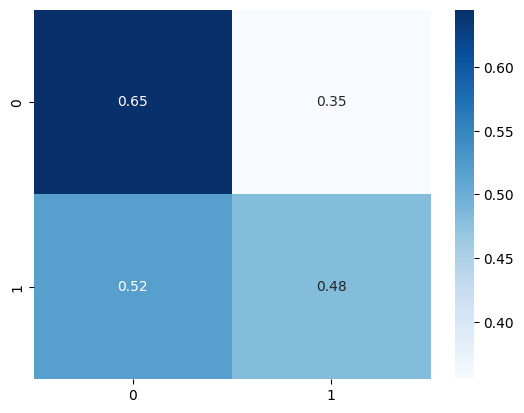

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='true'))
print("Confusion Matrix:")
(heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1]))


Mejora algo pero no lo sufiente.

In [ ]:
import numpy as np
thresholds = np.arange(.5, 6, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = f1_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.5
Mejor F1 obtenido: 0.7753058954393771


In [ ]:
import numpy as np
thresholds = np.arange(.001, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = accuracy_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.001
Mejor F1 obtenido: 0.7820299500831946


In [ ]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.7177548209366391
0.02515069668783778


In [ ]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [ ]:
---

In [ ]:
import dill
with open("modelo_pipe_dispute_synth.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [ ]:
trained_preprocessor.transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53193 stored elements and shape (6006, 439)>

In [ ]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

(6006, 1)
                                                   0
0  <Compressed Sparse Row sparse matrix of dtype ...
1  <Compressed Sparse Row sparse matrix of dtype ...
2  <Compressed Sparse Row sparse matrix of dtype ...
3  <Compressed Sparse Row sparse matrix of dtype ...
4  <Compressed Sparse Row sparse matrix of dtype ...
